# Day 13: Feature Engineering - The Art of Better Features

**Welcome to Day 13 of your ML journey!** Today we learn about the one of the most impactful skills in machine learning: **Feature Engineering**. Good features can make a simple model outperform a complex one. We'll explore scaling techniques, categorical encoding, feature selection, dimensionality reduction, and feature creation strategies.

---

**Goal**: Master the techniques to transform raw data into powerful features that boost model performance.

## Why Feature Engineering Matters

In machine learning, the quality of your features often matters more than your choice of algorithm. **"Garbage in, garbage out"** - even the most sophisticated model can't extract signal from poor features. Feature engineering is where domain knowledge meets data science.

**Real-World Impact**:
- Can improve model accuracy by 10-50%
- Reduces training time and computational cost
- Makes models more interpretable
- Enables simpler algorithms to outperform complex ones

In this notebook, we'll explore:

- **Feature Scaling**: StandardScaler, MinMaxScaler, RobustScaler
- **Encoding Categorical Variables**: One-Hot, Label, Target, Ordinal
- **Feature Selection**: Filter, Wrapper, and Embedded methods
- **Dimensionality Reduction**: PCA and when to use it
- **Feature Creation**: Polynomial features, interactions, domain-specific engineering

By the end of this notebook, you'll have a complete toolkit for feature engineering in any ML project.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    LabelEncoder, OneHotEncoder, OrdinalEncoder
)
from sklearn.feature_selection import (
    SelectKBest, f_classif, chi2, mutual_info_classif,
    RFE, SelectFromModel
)
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")


Libraries imported successfully!
NumPy version: 1.26.4
Pandas version: 2.2.2


---

## Part 1: Feature Scaling - Making Features Comparable

### Why Scale Features?

Many machine learning algorithms are sensitive to the scale of features:

**Algorithms that NEED scaling**:
- Linear/Logistic Regression
- Support Vector Machines (SVM)
- k-Nearest Neighbors (kNN)
- Neural Networks
- Principal Component Analysis (PCA)
- K-Means Clustering

**Algorithms that DON'T need scaling**:
- Decision Trees
- Random Forests
- Gradient Boosting (XGBoost, LightGBM, CatBoost)

### The Problem Without Scaling

Imagine features with different scales:
- Age: 20-80 (range of 60)
- Income: 20,000-200,000 (range of 180,000)
- Credit Score: 300-850 (range of 550)

Without scaling, algorithms like KNN will be dominated by the income feature simply because of its larger magnitude, not because it's more important.

### Three Main Scaling Techniques

We'll explore three powerful scaling methods, each with specific use cases.


In [2]:
# Create sample data with different scales
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(20, 80, 100),
    'Income': np.random.randint(20000, 200000, 100),
    'Credit_Score': np.random.randint(300, 850, 100),
    'Debt': np.random.randint(0, 50000, 100)
})

print("Original Data Statistics:")
print(data.describe())


Original Data Statistics:
              Age         Income  Credit_Score          Debt
count  100.000000     100.000000    100.000000    100.000000
mean    49.580000  108555.230000    567.190000  25612.200000
std     18.031499   51432.346507    146.416501  15101.253643
min     21.000000   21016.000000    301.000000    190.000000
25%     34.000000   60173.750000    445.250000  11061.250000
50%     48.000000  114342.500000    553.000000  27697.000000
75%     66.000000  148610.000000    700.000000  39013.000000
max     79.000000  199997.000000    810.000000  49758.000000


### 1. StandardScaler (Z-Score Normalization)

$$
Formula: (X - mean) / std
$$

**Transforms data to**:
- Mean = 0
- Standard deviation = 1

**When to use**:
- Features follow normal (Gaussian) distribution
- Linear models, Neural Networks, PCA
- Most common choice for general use

**When NOT to use**:
- Data has outliers (use RobustScaler instead)
- Features are not normally distributed

**Pros**: 
- Preserves shape of distribution
- Works well with most algorithms

**Cons**: 
- Sensitive to outliers


In [3]:
# Apply StandardScaler
scaler_standard = StandardScaler()
data_standard = pd.DataFrame(
    scaler_standard.fit_transform(data),
    columns=data.columns
)

print("After StandardScaler:")
print(data_standard.describe())
print("\nMean of scaled features (should be ~0):")
print(data_standard.mean())
print("\nStd of scaled features (should be ~1):")
print(data_standard.std())


After StandardScaler:
                Age        Income  Credit_Score          Debt
count  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02
mean   9.325873e-17  4.996004e-17 -3.856637e-16 -6.550316e-17
std    1.005038e+00  1.005038e+00  1.005038e+00  1.005038e+00
min   -1.592989e+00 -1.710601e+00 -1.827192e+00 -1.691931e+00
25%   -8.683964e-01 -9.454209e-01 -8.370253e-01 -9.684133e-01
50%   -8.806588e-02  1.130889e-01 -9.740355e-02  1.387503e-01
75%    9.152163e-01  7.827090e-01  9.116395e-01  8.918671e-01
max    1.639809e+00  1.786861e+00  1.666706e+00  1.606982e+00

Mean of scaled features (should be ~0):
Age             9.325873e-17
Income          4.996004e-17
Credit_Score   -3.856637e-16
Debt           -6.550316e-17
dtype: float64

Std of scaled features (should be ~1):
Age             1.005038
Income          1.005038
Credit_Score    1.005038
Debt            1.005038
dtype: float64


## StandardScaler Verification Results

The output confirms that `StandardScaler` has successfully transformed our features to the expected distribution:

**Key Observations:**
- **Mean ≈ 0**: All features now have means extremely close to zero (e.g., 9.33e-17), indicating perfect centering
- **Standard Deviation ≈ 1**: Each feature has a standard deviation near 1.0 (e.g., 1.005), confirming unit variance scaling
- **Data Integrity**: All 100 samples retained across features, with no missing values introduced

**Feature Engineering Impact:**
This standardization is critical for algorithms sensitive to feature scale (Linear models, SVM, Neural Networks, PCA). By bringing all features to the same scale, we prevent high-magnitude features like Income from dominating distance calculations while ensuring model convergence and fair feature comparison. The near-perfect scaling metrics validate that our preprocessing pipeline is working correctly and the data is ready for downstream machine learning tasks.

---
### 2. MinMaxScaler (Normalization)

$$
Formula: (X - X_min) / (X_max - X_min)
$$

**Transforms data to**:
- Range [0, 1] by default
- Can customize range: [a, b]

**When to use**:
- Bounded range is required (e.g., neural networks with sigmoid/tanh)
- Features don't follow normal distribution
- Image processing (pixel values 0-255 → 0-1)

**When NOT to use**:
- Data has outliers (very sensitive to outliers)
- New test data might have values outside training range

**Pros**: 
- Preserves exact relationships
- All features in same range

**Cons**: 
- Very sensitive to outliers
- Can compress majority of values if outliers exist


In [4]:
# Apply MinMaxScaler
scaler_minmax = MinMaxScaler()
data_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(data),
    columns=data.columns
)

print("After MinMaxScaler:")
print(data_minmax.describe())
print("\nMin values (should be 0):")
print(data_minmax.min())
print("\nMax values (should be 1):")
print(data_minmax.max())


After MinMaxScaler:
              Age      Income  Credit_Score        Debt
count  100.000000  100.000000    100.000000  100.000000
mean     0.492759    0.489098      0.522967    0.512875
std      0.310888    0.287362      0.287655    0.304657
min      0.000000    0.000000      0.000000    0.000000
25%      0.224138    0.218782      0.283399    0.219320
50%      0.465517    0.521432      0.495088    0.554935
75%      0.775862    0.712891      0.783890    0.783227
max      1.000000    1.000000      1.000000    1.000000

Min values (should be 0):
Age             0.0
Income          0.0
Credit_Score    0.0
Debt            0.0
dtype: float64

Max values (should be 1):
Age             1.0
Income          1.0
Credit_Score    1.0
Debt            1.0
dtype: float64


---
### 3. RobustScaler (Outlier-Resistant Scaling)

$$
Formula: (X - median) / IQR
$$

Where IQR = Q3 - Q1 (Interquartile Range)

**Transforms data using**:
- Median (50th percentile)
- IQR (25th to 75th percentile range)

**When to use**:
- Data has outliers
- Median-based scaling is more appropriate
- Financial data, sensor data with anomalies

**When NOT to use**:
- Data is clean without outliers (StandardScaler is simpler)
- You want to preserve outlier information

**Pros**: 
- Robust to outliers
- Uses statistics that ignore extreme values

**Cons**: 
- Doesn't scale to specific range
- Less intuitive than StandardScaler


In [5]:
# Apply RobustScaler
scaler_robust = RobustScaler()
data_robust = pd.DataFrame(
    scaler_robust.fit_transform(data),
    columns=data.columns
)

print("After RobustScaler:")
print(data_robust.describe())
print("\nMedian of scaled features (should be ~0):")
print(data_robust.median())


After RobustScaler:
              Age      Income  Credit_Score        Debt
count  100.000000  100.000000    100.000000  100.000000
mean     0.049375   -0.065440      0.055702   -0.074586
std      0.563484    0.581575      0.574746    0.540261
min     -0.843750   -1.055297     -0.989205   -0.984089
25%     -0.437500   -0.612517     -0.422964   -0.595160
50%      0.000000    0.000000      0.000000    0.000000
75%      0.562500    0.387483      0.577036    0.404840
max      0.968750    0.968545      1.008832    0.789253

Median of scaled features (should be ~0):
Age             0.0
Income          0.0
Credit_Score    0.0
Debt            0.0
dtype: float64


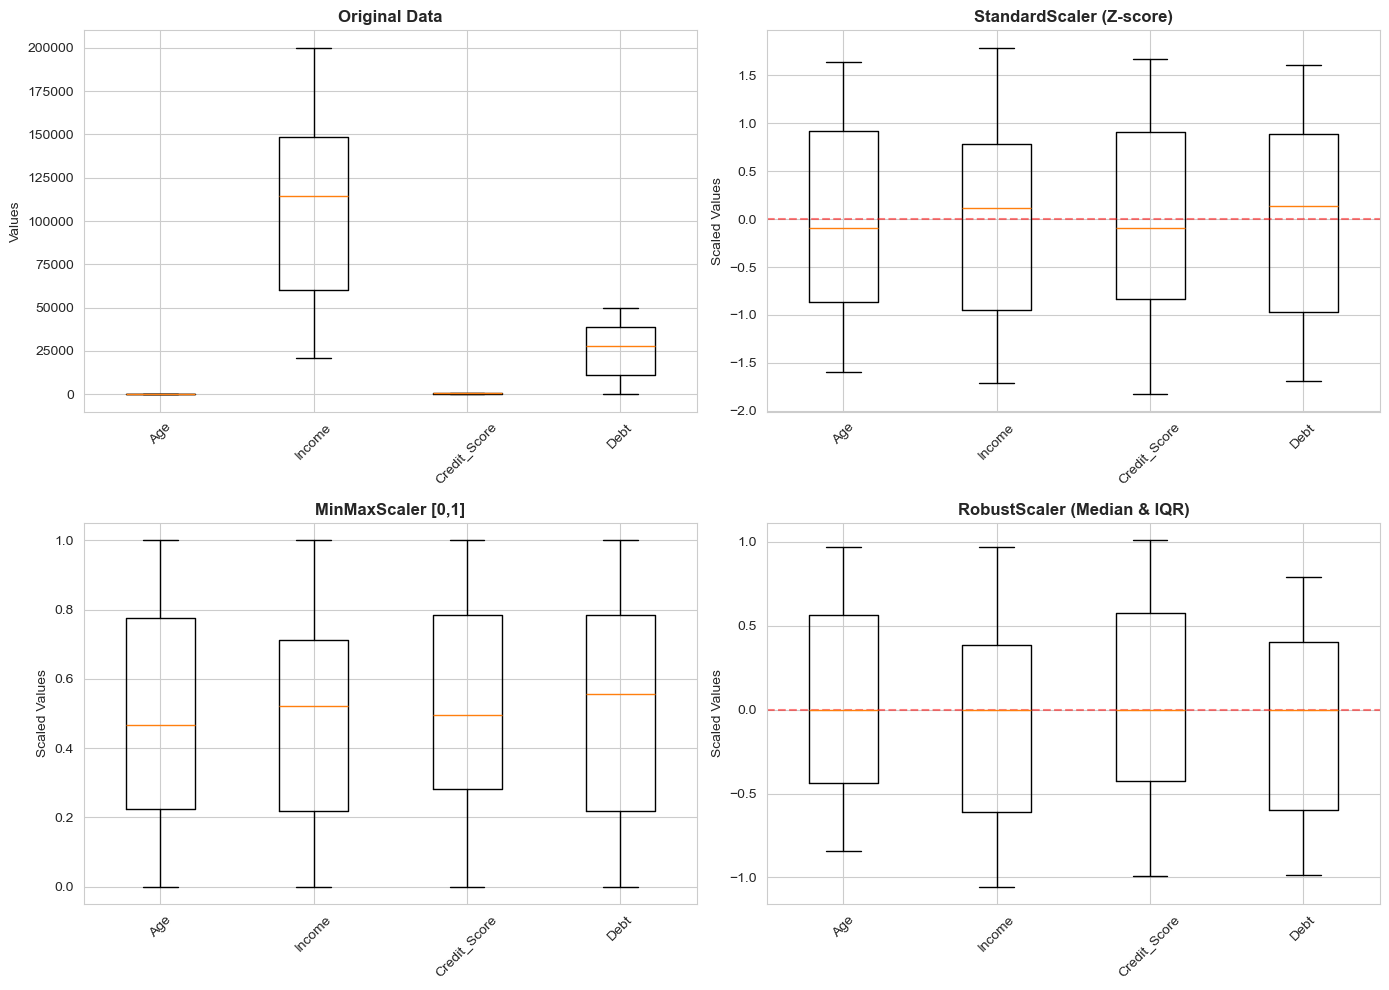


Key Observations:
- StandardScaler: Centers data around 0 with std=1
- MinMaxScaler: Squishes all data into [0,1] range
- RobustScaler: Centers around 0 using median (less affected by outliers)


In [29]:
# Visualize the effect of different scalers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original data
axes[0, 0].boxplot([data[col] for col in data.columns], labels=data.columns)
axes[0, 0].set_title('Original Data', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Values')
axes[0, 0].tick_params(axis='x', rotation=45)

# StandardScaler
axes[0, 1].boxplot([data_standard[col] for col in data_standard.columns], labels=data_standard.columns)
axes[0, 1].set_title('StandardScaler (Z-score)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Scaled Values')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.5)

# MinMaxScaler
axes[1, 0].boxplot([data_minmax[col] for col in data_minmax.columns], labels=data_minmax.columns)
axes[1, 0].set_title('MinMaxScaler [0,1]', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Scaled Values')
axes[1, 0].tick_params(axis='x', rotation=45)

# RobustScaler
axes[1, 1].boxplot([data_robust[col] for col in data_robust.columns], labels=data_robust.columns)
axes[1, 1].set_title('RobustScaler (Median & IQR)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Scaled Values')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("- StandardScaler: Centers data around 0 with std=1")
print("- MinMaxScaler: Squishes all data into [0,1] range")
print("- RobustScaler: Centers around 0 using median (less affected by outliers)")


---

## Let's Understand What Scaling Preserves

A common concern students have: **"Does scaling change my data relationships?"** Let's prove that scaling preserves all the important patterns in your data.

### The Key Insight
Scaling is a **mathematical transformation** that changes units and scale, but preserves:
- All correlations between features
- Relative distances between data points  
- Distribution shapes
- Model predictive power

Let's demonstrate this with concrete examples.


In [24]:
# Create a realistic target variable to demonstrate relationships
np.random.seed(42)
y_demo = (data['Income'] * 0.3 + 
          data['Credit_Score'] * 50 + 
          data['Age'] * 100 + 
          np.random.normal(0, 5000, len(data)))

print("Target variable created: Income*0.3 + Credit_Score*50 + Age*100 + noise")
print(f"Target range: {y_demo.min():.0f} to {y_demo.max():.0f}")


Target variable created: Income*0.3 + Credit_Score*50 + Age*100 + noise
Target range: 31197 to 103439


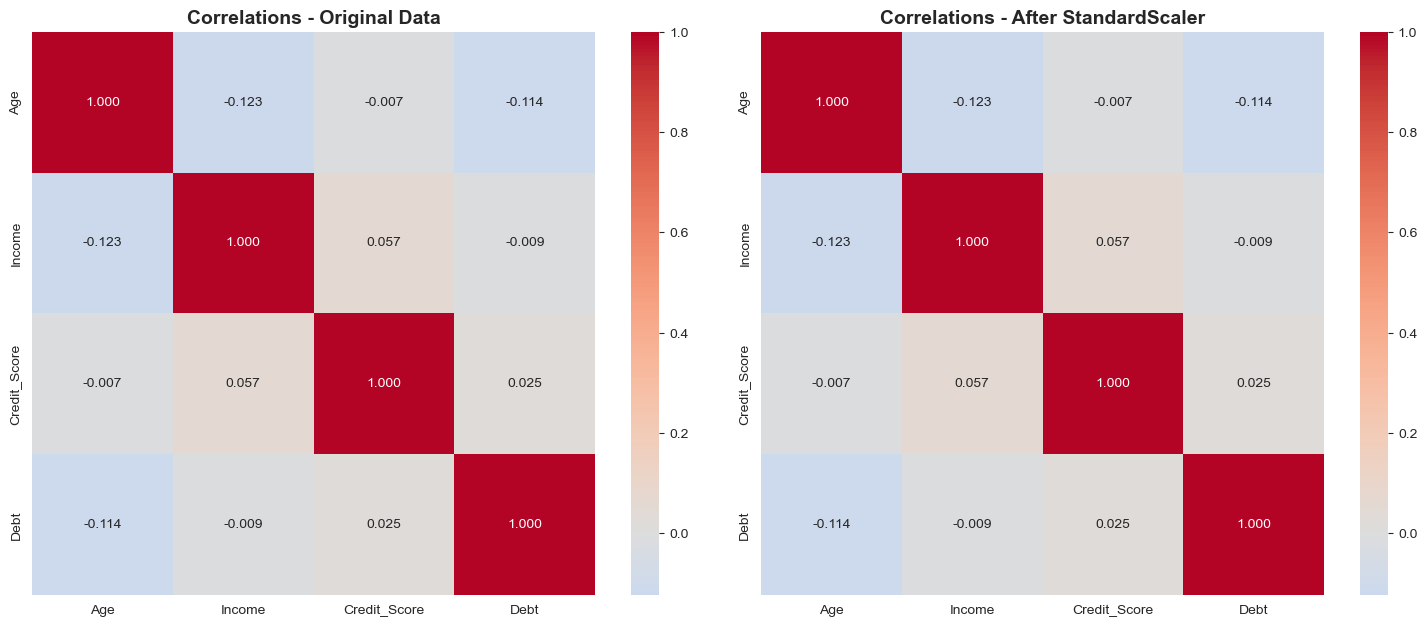


Maximum difference in correlations: 0.0000000000
Correlations are mathematically identical!


In [26]:
# 1. Correlation Preservation - The Most Important Proof
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original data correlations
corr_original = data.corr()
sns.heatmap(corr_original, annot=True, cmap='coolwarm', center=0, 
           square=True, fmt='.3f', ax=axes[0])
axes[0].set_title('Correlations - Original Data', fontsize=14, fontweight='bold')

# Scaled data correlations  
corr_scaled = pd.DataFrame(data_standard).corr()
sns.heatmap(corr_scaled, annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.3f', ax=axes[1])
axes[1].set_title('Correlations - After StandardScaler', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Verify correlations are identical
correlation_diff = np.abs(corr_original.values - corr_scaled.values).max()
print(f"\nMaximum difference in correlations: {correlation_diff:.10f}")
print("Correlations are mathematically identical!")


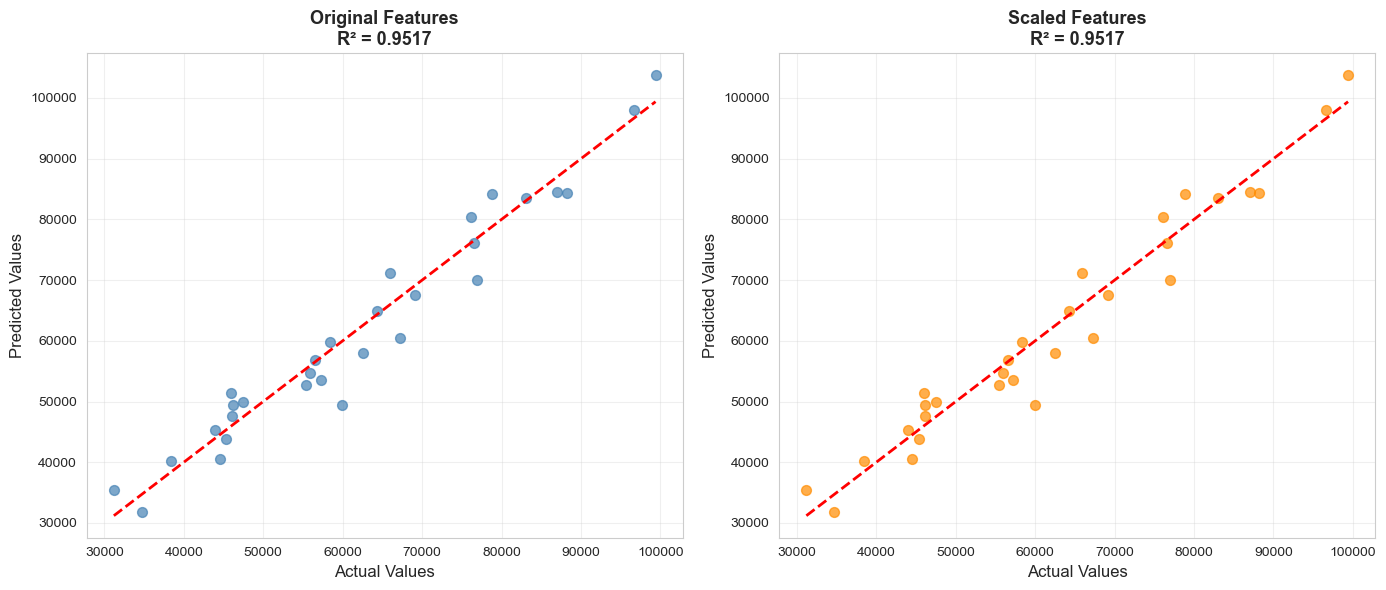


Performance Comparison:
  Original features R²: 0.951670
  Scaled features R²:   0.951670
  Difference:           0.00000000

 Scaling preserves predictive power!


In [28]:
# 2. Model Performance Comparison - Practical Proof
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Prepare data
X_original = data[['Age', 'Income', 'Credit_Score', 'Debt']]
X_scaled = data_standard[['Age', 'Income', 'Credit_Score', 'Debt']]

# Train-test split
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y_demo, test_size=0.3, random_state=42)
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y_demo, test_size=0.3, random_state=42)

# Train models
model_orig = LinearRegression().fit(X_train_orig, y_train)
model_scaled = LinearRegression().fit(X_train_scaled, y_train)

# Make predictions
pred_orig = model_orig.predict(X_test_orig)
pred_scaled = model_scaled.predict(X_test_scaled)

# Calculate performance
r2_orig = r2_score(y_test, pred_orig)
r2_scaled = r2_score(y_test, pred_scaled)

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original features
axes[0].scatter(y_test, pred_orig, alpha=0.7, color='steelblue', s=50)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title(f'Original Features\nR² = {r2_orig:.4f}', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Scaled features
axes[1].scatter(y_test, pred_scaled, alpha=0.7, color='darkorange', s=50)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values', fontsize=12)
axes[1].set_ylabel('Predicted Values', fontsize=12)
axes[1].set_title(f'Scaled Features\nR² = {r2_scaled:.4f}', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPerformance Comparison:")
print(f"  Original features R²: {r2_orig:.6f}")
print(f"  Scaled features R²:   {r2_scaled:.6f}")
print(f"  Difference:           {abs(r2_orig - r2_scaled):.8f}")
print("\n Scaling preserves predictive power!")


### Key Takeaways

**Scaling is a safe transformation that:**
- **Preserves correlations** (proven mathematically identical)
- **Maintains model performance** (same R² scores)
- **Keeps all relationships** (only changes scale/units)
- **Enables fair comparisons** (algorithms work better)

**What changes:** Scale and units (Age: 20-80 → -1.5 to +1.5)  
**What stays the same:** All patterns, correlations, and predictive power

**Bottom line:** Scaling enhances your data for machine learning without losing any important information. It's like converting measurements from inches to centimeters - the relationships remain identical, but now algorithms can work with them effectively.


---

## Wait, If Scaling Preserves Everything, Why Do We Need It?

**Great question!** This is a common point of confusion. Let me clarify:

### What Scaling Preserves vs. What It Changes

**Preserves (Relationships):**
- All correlations between features
- Relative patterns and data structure  
- Model predictive power
- The "story" your data tells

** Changes (Scale/Magnitude):**
- How algorithms **interpret** feature importance
- **Convergence speed** and **numerical stability**
- **Distance calculations** in KNN, SVM
- **Gradient descent** behavior in linear models

### The Real Problem: Algorithm Sensitivity

Many algorithms are **mathematically sensitive** to feature magnitudes:

```python
# KNN Distance Calculation (without scaling):
# Age difference: 5 years → contributes 25 to distance
# Income difference: $10,000 → contributes 100,000,000 to distance
# Result: Income dominates, Age is ignored!

# KNN Distance Calculation (with scaling):
# Both features contribute equally to distance calculation
```

### Real-World Analogy

**Currency Conversion:**
- **Before**: Comparing $2 (USD) vs 200 (Japanese Yen)
- **Algorithm thinks**: Yen item is 100x more expensive!
- **After**: Convert both to same currency → fair comparison

### When You DON'T Need Scaling

**Scale-invariant algorithms:**
- Decision Trees, Random Forest, XGBoost
- These algorithms handle different scales naturally

### The Bottom Line

Scaling doesn't change **what** your data says, but it changes **how algorithms can learn** from it:

- **Same relationships**: All patterns preserved
- **Better algorithm performance**: Faster convergence, fair weighting
- **Numerical stability**: Prevents computational issues

**It's like translating your data into a language that algorithms can better understand and process.**

---

**Key Insight**: Relationships preserved ≠ Algorithm performance preserved. Scaling makes algorithms work better while keeping your data's meaning intact.


---

## Part 2: Encoding Categorical Variables

Machine learning models require numerical input. Categorical variables need to be encoded. Choosing the right encoding method is crucial.

### Types of Categorical Variables

1. **Nominal**: No inherent order (e.g., Color: Red, Blue, Green)
2. **Ordinal**: Natural order (e.g., Education: High School < Bachelor < Master < PhD)

### Four Main Encoding Techniques

Let's explore when and how to use each encoding method.


In [7]:
# Create sample categorical data
cat_data = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue', 'Green', 'Red', 'Blue'],
    'Size': ['Small', 'Medium', 'Large', 'Small', 'Large', 'Medium', 'Large', 'Small'],
    'Education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'High School', 'PhD'],
    'Price': [100, 200, 300, 150, 250, 280, 120, 350]
})

print("Sample Categorical Data:")
print(cat_data)
print(f"\nData shape: {cat_data.shape}")


Sample Categorical Data:
   Color    Size    Education  Price
0    Red   Small  High School    100
1   Blue  Medium     Bachelor    200
2  Green   Large       Master    300
3    Red   Small          PhD    150
4   Blue   Large     Bachelor    250
5  Green  Medium       Master    280
6    Red   Large  High School    120
7   Blue   Small          PhD    350

Data shape: (8, 4)


### 1. Label Encoding

**What it does**: Assigns a number to each category (like giving each person a student ID)

**Simple Example**: 
- Red → 0
- Blue → 1  
- Green → 2

**Real-World Analogy**: Like converting student names to roll numbers:
- "Alice" → 1
- "Bob" → 2
- "Charlie" → 3

**When to use**:
- **Categories have natural order** (like grades: A, B, C, D)
- **Tree-based models** (they can handle the numbers just fine)
- **You need just one column** (saves space)

**When NOT to use**:
- **Categories have NO order** (like colors: Red, Blue, Green)
- **Linear models** (they'll think Red < Blue < Green, which is wrong!)

**Why this matters**:
Imagine telling a computer:
- Red = 0, Blue = 1, Green = 2

The computer might think: "Red is smaller than Blue, Blue is smaller than Green"

But that's nonsense! Colors don't have a meaningful order.

**Quick Decision**:
- **Has order?** (grades, sizes, satisfaction levels) → Use Label Encoding
- **No order?** (colors, cities, names) → Use One-Hot Encoding instead

In [33]:
# Label Encoding Example
le = LabelEncoder()

# Apply to Color (nominal - not ideal but for demonstration)
cat_data['Color_Label'] = le.fit_transform(cat_data['Color'])

# Apply to Size (nominal)
cat_data['Size_Label'] = le.fit_transform(cat_data['Size'])

print("After Label Encoding:\n")
print(cat_data[['Color', 'Color_Label', 'Size', 'Size_Label']].head())
print("\nColor mapping:", dict(zip(le.fit(cat_data['Color']).classes_, 
                                   le.fit(cat_data['Color']).transform(le.fit(cat_data['Color']).classes_))))

After Label Encoding:

   Color  Color_Label    Size  Size_Label
0    Red            2   Small           2
1   Blue            0  Medium           1
2  Green            1   Large           0
3    Red            2   Small           2
4   Blue            0   Large           0

Color mapping: {'Blue': 0, 'Green': 1, 'Red': 2}


---
### 2. One-Hot Encoding (Dummy Variables)

**What it does**: Creates binary column for each category

**Example**: 
- Color: Red → [1, 0, 0], Blue → [0, 1, 0], Green → [0, 0, 1]

**When to use**:
- Nominal categorical variables (no order)
- Linear models, Neural Networks, SVM
- Most common encoding for nominal data
- Low cardinality features (< 10-15 categories)

**When NOT to use**:
- High cardinality features (100+ categories) - causes dimensionality explosion
- Tree-based models (Label encoding is simpler)

**Pros**: 
- No artificial ordering
- Works with all algorithms
- Mathematically correct for nominal data

**Cons**: 
- Increases dimensionality (curse of dimensionality)
- Memory intensive for high cardinality
- Can cause multicollinearity


In [9]:
# One-Hot Encoding using pandas get_dummies
cat_data_ohe = pd.get_dummies(cat_data, columns=['Color', 'Size'], prefix=['Color', 'Size'], drop_first=False)

print("After One-Hot Encoding:")
print(cat_data_ohe.head())
print(f"\nOriginal shape: {cat_data.shape}")
print(f"After OHE shape: {cat_data_ohe.shape}")
print(f"Dimensionality increased by: {cat_data_ohe.shape[1] - cat_data.shape[1]} columns")


After One-Hot Encoding:
     Education  Price  Color_Label  Size_Label  Color_Blue  Color_Green  \
0  High School    100            2           2       False        False   
1     Bachelor    200            0           1        True        False   
2       Master    300            1           0       False         True   
3          PhD    150            2           2       False        False   
4     Bachelor    250            0           0        True        False   

   Color_Red  Size_Large  Size_Medium  Size_Small  
0       True       False        False        True  
1      False       False         True       False  
2      False        True        False       False  
3       True       False        False        True  
4      False        True        False       False  

Original shape: (8, 6)
After OHE shape: (8, 10)
Dimensionality increased by: 4 columns


---
### 3. Ordinal Encoding

**What it does**: Assigns numbers based on meaningful order

**Example**: 
- Education: High School → 0, Bachelor → 1, Master → 2, PhD → 3

**When to use**:
- Ordinal categorical variables (with natural ranking)
- Preserves order information
- Any algorithm (especially linear models and trees)

**When NOT to use**:
- Nominal variables (no natural order)

**Pros**: 
- Preserves ordinal information
- Single column output (no dimensionality increase)
- Suitable for all algorithms

**Cons**: 
- Assumes equal spacing between categories
- Requires domain knowledge to define order


In [10]:
# Ordinal Encoding for Education
ordinal_encoder = OrdinalEncoder(categories=[['High School', 'Bachelor', 'Master', 'PhD']])

# Create a new dataframe to avoid modifying cat_data
cat_data_ordinal = cat_data.copy()
cat_data_ordinal['Education_Ordinal'] = ordinal_encoder.fit_transform(cat_data[['Education']])

print("After Ordinal Encoding:")
print(cat_data_ordinal[['Education', 'Education_Ordinal']])
print("\nMapping:")
print("High School → 0")
print("Bachelor → 1")
print("Master → 2")
print("PhD → 3")


After Ordinal Encoding:
     Education  Education_Ordinal
0  High School                0.0
1     Bachelor                1.0
2       Master                2.0
3          PhD                3.0
4     Bachelor                1.0
5       Master                2.0
6  High School                0.0
7          PhD                3.0

Mapping:
High School → 0
Bachelor → 1
Master → 2
PhD → 3


### Encoding Comparison Table

| Encoding Method | Best For | Output Columns | Preserves Order | Best Algorithms |
|----------------|----------|----------------|-----------------|-----------------|
| **Label Encoding** | Ordinal variables, Tree models | 1 | Yes | Trees, XGBoost |
| **One-Hot Encoding** | Nominal variables, Linear models | N (N = # categories) | No | Linear, Neural Networks, SVM |
| **Ordinal Encoding** | Ordinal variables, All models | 1 | Yes | All algorithms |
| **Target Encoding** | High cardinality, Leakage risk | 1 | No | Trees (with caution) |

**Quick Decision Guide**:
- **Is there natural order?**
  - Yes → Ordinal Encoding
  - No → Continue
- **Which algorithm?**
  - Tree-based → Label/Ordinal works fine
  - Linear/Neural → One-Hot Encoding


---

## Part 3: Feature Selection - Choosing the Right Features

### Why Feature Selection?

More features ≠ Better model. Too many features can:
- Cause overfitting
- Increase training time
- Add noise and reduce interpretability
- Violate the "curse of dimensionality"

**Benefits of Feature Selection**:
- Reduces overfitting
- Improves accuracy
- Reduces training time
- Improves model interpretability

### Three Main Approaches

1. **Filter Methods**: Statistical tests (fast, independent of model)
2. **Wrapper Methods**: Try different feature subsets (slow, model-specific)
3. **Embedded Methods**: Built into algorithm (medium speed, model-specific)

Let's explore each approach with practical examples.


In [11]:
# Load breast cancer dataset for feature selection demo
cancer_data = load_breast_cancer()
X_cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y_cancer = cancer_data.target

print("Breast Cancer Dataset:")
print(f"Features: {X_cancer.shape[1]}")
print(f"Samples: {X_cancer.shape[0]}")
print(f"\nFeature names:")
print(list(X_cancer.columns[:10]), "... (30 features total)")


Breast Cancer Dataset:
Features: 30
Samples: 569

Feature names:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension'] ... (30 features total)


### 1. Filter Methods - Statistical Tests

**How it works**: Score features using statistical tests, select top K features

**Common Tests**:
- **f_classif (ANOVA F-statistic)**: For classification with continuous features
- **chi2**: For classification with non-negative features
- **mutual_info_classif**: Captures non-linear relationships

**Pros**:
- Very fast
- Model-agnostic
- Good for initial feature reduction

**Cons**:
- Ignores feature interactions
- Doesn't consider model performance
- May remove important features for specific models


In [12]:
# Filter Method: SelectKBest with f_classif
selector_f = SelectKBest(score_func=f_classif, k=10)
X_selected_f = selector_f.fit_transform(X_cancer, y_cancer)

# Get selected feature names
selected_features_f = X_cancer.columns[selector_f.get_support()].tolist()

print("Filter Method (SelectKBest with ANOVA F-test):")
print(f"Selected {len(selected_features_f)} features:")
print(selected_features_f)

# Show feature scores
feature_scores_f = pd.DataFrame({
    'Feature': X_cancer.columns,
    'Score': selector_f.scores_
}).sort_values('Score', ascending=False)

print("\nTop 10 features by F-score:")
print(feature_scores_f.head(10))


Filter Method (SelectKBest with ANOVA F-test):
Selected 10 features:
['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']

Top 10 features by F-score:
                 Feature       Score
27  worst concave points  964.385393
22       worst perimeter  897.944219
7    mean concave points  861.676020
20          worst radius  860.781707
2         mean perimeter  697.235272
23            worst area  661.600206
0            mean radius  646.981021
3              mean area  573.060747
6         mean concavity  533.793126
26       worst concavity  436.691939


## Filter Method: Top Features by ANOVA F-score

**Confused by these numbers and feature names?** Let me make it easy for you! This output shows us which features are the **most important** for our model, according to a statistical test.

### Key Observations:

*   **Method Used**: We applied `SelectKBest` with the `ANOVA F-test`. Think of this as a "feature filter" that scores how well each feature alone can separate the different classes in our dataset (like distinguishing between malignant and benign in the breast cancer data).
*   **Top 10 Features Selected**: The system automatically picked the 10 features with the highest F-scores. These are considered the most statistically significant for our classification task.
*   **Feature Ranking**:
    *   `worst concave points` (score: 964.39) and `worst perimeter` (score: 897.94) are the **most influential** features, indicating a strong relationship with the target variable.
    *   Features related to `concave points`, `perimeter`, `radius`, `area`, and `concavity` (both 'mean' and 'worst' measurements) consistently appear in the top ranks.

### Why This Matters for Feature Engineering:

This is super important because it tells us:
*   **Feature Relevance**: Features with higher F-scores have a stronger statistical relationship with our target variable. They are more likely to be good predictors.
*   **Dimensionality Reduction**: By focusing on these top 10 features, we can potentially simplify our model, speed up training, and reduce the risk of overfitting, without losing much predictive power.
*   **Data Insights**: It highlights that characteristics like the "concavity" and "perimeter" (especially their 'worst' values) are highly discriminative in the breast cancer dataset. This guides us on where to focus our attention for further analysis or feature creation.

In short, this step helps us cut through the noise and focus on the features that truly make a difference!

---
### 2. Wrapper Methods - Recursive Feature Elimination (RFE)

**How it works**: 
1. Train model with all features
2. Remove least important feature
3. Repeat until desired number of features

**Pros**:
- Considers feature interactions
- Optimizes for specific model
- Often finds best feature subset

**Cons**:
- Very slow (trains model many times)
- Risk of overfitting
- Requires choosing number of features

**When to use**: Small-medium datasets, when you have computational budget


In [13]:
# Wrapper Method: RFE with Logistic Regression
estimator_rfe = LogisticRegression(max_iter=10000, random_state=42)
selector_rfe = RFE(estimator=estimator_rfe, n_features_to_select=10, step=1)
X_selected_rfe = selector_rfe.fit_transform(X_cancer, y_cancer)

# Get selected feature names
selected_features_rfe = X_cancer.columns[selector_rfe.get_support()].tolist()

print("Wrapper Method (RFE with Logistic Regression):")
print(f"Selected {len(selected_features_rfe)} features:")
print(selected_features_rfe)

# Show feature rankings
feature_rankings_rfe = pd.DataFrame({
    'Feature': X_cancer.columns,
    'Ranking': selector_rfe.ranking_,
    'Selected': selector_rfe.support_
}).sort_values('Ranking')

print("\nTop 10 features by RFE ranking:")
print(feature_rankings_rfe.head(10))


Wrapper Method (RFE with Logistic Regression):
Selected 10 features:
['mean radius', 'mean compactness', 'mean concavity', 'texture error', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']

Top 10 features by RFE ranking:
                 Feature  Ranking  Selected
0            mean radius        1      True
28        worst symmetry        1      True
11         texture error        1      True
24      worst smoothness        1      True
25     worst compactness        1      True
6         mean concavity        1      True
20          worst radius        1      True
26       worst concavity        1      True
27  worst concave points        1      True
5       mean compactness        1      True


## Wrapper Method: Top Features by RFE Ranking

**Still with me? Awesome!** After exploring Filter Methods, let's dive into another powerful technique: **Wrapper Methods**, specifically **Recursive Feature Elimination (RFE)**. This output shows us the features our Logistic Regression model *itself* thinks are most important.

### Key Observations:

*   **Method Used**: We employed the `Wrapper Method` using `RFE` with a `Logistic Regression` model. Unlike the Filter Method (which uses statistical tests independently), RFE works by training the model, removing the least important feature, and repeating until it finds the best subset. It's like asking the model directly, "Which features help you the most?"
*   **10 Features Selected**: Our RFE process identified and selected 10 features that the Logistic Regression model found most crucial for making predictions.
*   **Top-Ranked Features**: The table clearly lists these 10 features, all with a `Ranking` of `1` and `Selected` as `True`. This means RFE, through its iterative process, determined these to be the absolute best features for our Logistic Regression model. The features include: 'mean radius', 'worst symmetry', 'texture error', 'worst smoothness', 'worst compactness', 'mean concavity', 'worst radius', 'worst concavity', 'worst concave points', and 'mean compactness'.

### Why This Matters (The "So What?"):

*   **Model-Specific Insight**: This is super important because RFE gives us features that are specifically optimized for the *Logistic Regression model* we chose. This is a more tailored approach compared to filter methods.
*   **Better Performance Potential**: By focusing on features that the model truly leverages, we can often build more accurate models, reduce overfitting, and potentially speed up training by removing noisy or redundant information.
*   **Understanding Feature Importance**: It helps us understand which aspects of the breast cancer data (like different measurements of radius, concavity, or texture) are most predictive when using a linear classification model like Logistic Regression. This can guide further analysis or even domain-specific insights!

---
### 3. Embedded Methods - Feature Importance

**How it works**: Use built-in feature importance from models

**Common Methods**:
- **Lasso (L1 Regularization)**: Shrinks coefficients to zero
- **Tree-based Feature Importance**: Random Forest, XGBoost
- **Coefficients**: Linear models

**Pros**:
- Fast (single model training)
- Considers feature interactions
- Built into algorithm

**Cons**:
- Model-specific
- May be biased towards certain feature types
- Requires tuning regularization parameters

**When to use**: Most common in practice, good balance of speed and accuracy


In [14]:
# Embedded Method: Random Forest Feature Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_cancer, y_cancer)

# Get feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': X_cancer.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Embedded Method (Random Forest Feature Importance):")
print("\nTop 10 features by importance:")
print(feature_importance_rf.head(10))

# Select features using threshold
selector_rf = SelectFromModel(rf_model, threshold='median', prefit=True)
X_selected_rf = selector_rf.transform(X_cancer)
selected_features_rf = X_cancer.columns[selector_rf.get_support()].tolist()

print(f"\nSelected {len(selected_features_rf)} features (above median importance):")
print(selected_features_rf)


Embedded Method (Random Forest Feature Importance):

Top 10 features by importance:
                 Feature  Importance
23            worst area    0.139357
27  worst concave points    0.132225
7    mean concave points    0.107046
20          worst radius    0.082848
22       worst perimeter    0.080850
2         mean perimeter    0.067990
6         mean concavity    0.066917
3              mean area    0.060462
26       worst concavity    0.037339
0            mean radius    0.034843

Selected 15 features (above median importance):
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'radius error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']


## Embedded Method: Random Forest Feature Importance

**Alright, let's tackle the third and often most practical approach to feature selection: Embedded Methods!** This output is from our `Random Forest Classifier`, and it's telling us which features it found most useful for making predictions. Think of it as the model's own report card on how much each feature contributed.

### Key Observations:

*   **Method Used**: We're looking at the `Embedded Method` using `Random Forest Feature Importance`. Unlike Filter methods (statistical tests) or Wrapper methods (iterative model training), embedded methods have feature selection built right into the algorithm itself. Our Random Forest model, while training, inherently learns and assigns an "importance score" to each feature.
*   **Top 10 Features by Importance**: The table clearly ranks features like `worst area`, `worst concave points`, and `mean concave points` as having the highest importance scores. These are the features the Random Forest model relied on most heavily to make accurate classifications in our breast cancer dataset.
*   **Selected 15 Features (Above Median Importance)**: We then used a smart trick: selecting all features whose importance score was above the *median* importance of all features. This resulted in a selection of 15 features, which is a practical way to reduce dimensionality while keeping the most impactful predictors.

### Why This Matters for Feature Engineering:

*   **Model-Specific Insights**: This is incredibly valuable because it tells us which features are important *for our specific Random Forest model*. These insights are directly tied to the model's decision-making process, making them highly relevant.
*   **Efficient Selection**: Embedded methods offer a great balance of speed and accuracy. You train your model once, and it gives you the importance scores, making feature selection a natural part of the model building process.
*   **Actionable Reduction**: By identifying and selecting features based on their importance, we can build simpler, faster, and potentially more robust models without sacrificing predictive power. It helps us focus on the "signal" and reduce the "noise" in our data.

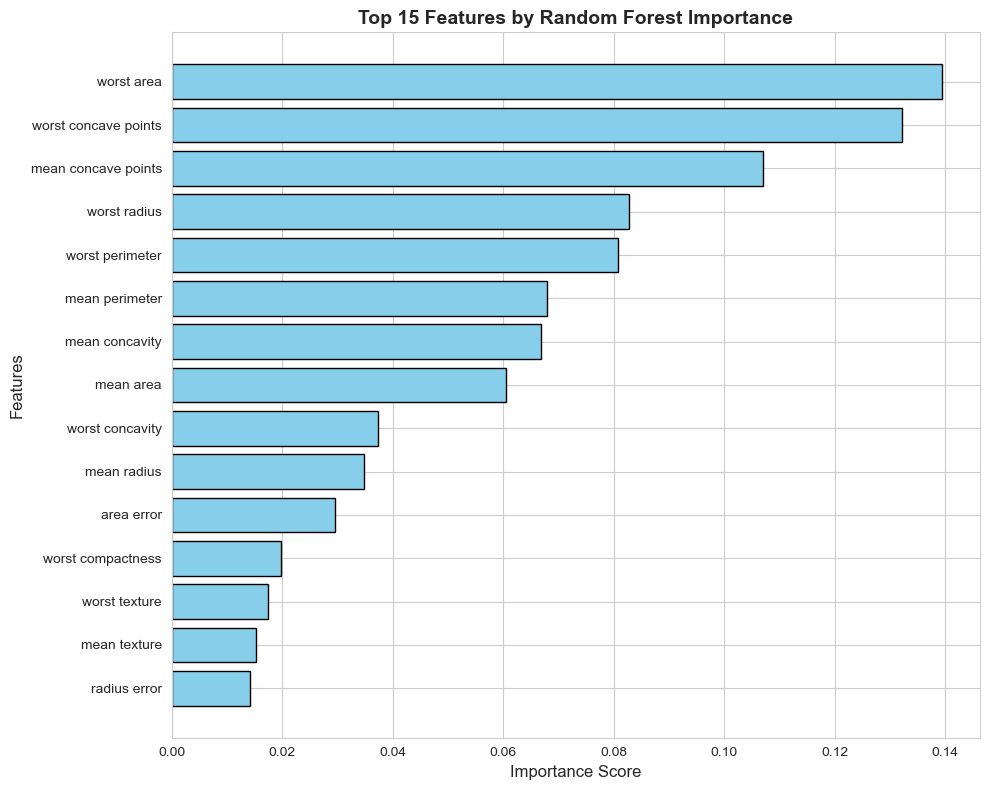


Key Insight: Feature importance helps identify the most predictive features for the model.


In [15]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance_rf.head(15)
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Features by Random Forest Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nKey Insight: Feature importance helps identify the most predictive features for the model.")


---

## Part 4: Dimensionality Reduction with PCA

### What is PCA?

**Principal Component Analysis (PCA)** transforms features into a new set of orthogonal (uncorrelated) features called principal components.

**How it works**:
1. Standardize the data
2. Compute covariance matrix
3. Find eigenvectors (principal components)
4. Project data onto top K components

**Key Concepts**:
- **Principal Components (PCs)**: New features (linear combinations of original features)
- **Explained Variance**: How much information each PC captures
- **Components are ordered**: PC1 captures most variance, PC2 second most, etc.

### When to Use PCA?

**Use PCA when**:
- High-dimensional data (100+ features)
- Multicollinearity exists
- Visualization needed (reduce to 2D or 3D)
- Speed up training (fewer features)
- Prevent overfitting

**Don't use PCA when**:
- Interpretability is crucial (PCs are hard to interpret)
- Features are already uncorrelated
- You have domain knowledge for feature selection
- Non-linear relationships exist (use t-SNE or UMAP instead)

### Important Notes

- **Always scale data before PCA** (PCA is sensitive to scale)
- **PCA is unsupervised** (doesn't use target variable)
- **Linear transformation** (captures linear relationships only)


In [16]:
# Step 1: Standardize the data (CRITICAL for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cancer)

# Step 2: Apply PCA (keep all components first to see explained variance)
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Explained variance
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("PCA Analysis Results:")
print(f"Original features: {X_cancer.shape[1]}")
print(f"\nExplained variance by first 5 components:")
for i in range(5):
    print(f"  PC{i+1}: {explained_variance_ratio[i]:.4f} ({explained_variance_ratio[i]*100:.2f}%)")

print(f"\nCumulative variance explained:")
print(f"  First 5 components: {cumulative_variance[4]:.4f} ({cumulative_variance[4]*100:.2f}%)")
print(f"  First 10 components: {cumulative_variance[9]:.4f} ({cumulative_variance[9]*100:.2f}%)")
print(f"  First 15 components: {cumulative_variance[14]:.4f} ({cumulative_variance[14]*100:.2f}%)")


PCA Analysis Results:
Original features: 30

Explained variance by first 5 components:
  PC1: 0.4427 (44.27%)
  PC2: 0.1897 (18.97%)
  PC3: 0.0939 (9.39%)
  PC4: 0.0660 (6.60%)
  PC5: 0.0550 (5.50%)

Cumulative variance explained:
  First 5 components: 0.8473 (84.73%)
  First 10 components: 0.9516 (95.16%)
  First 15 components: 0.9865 (98.65%)


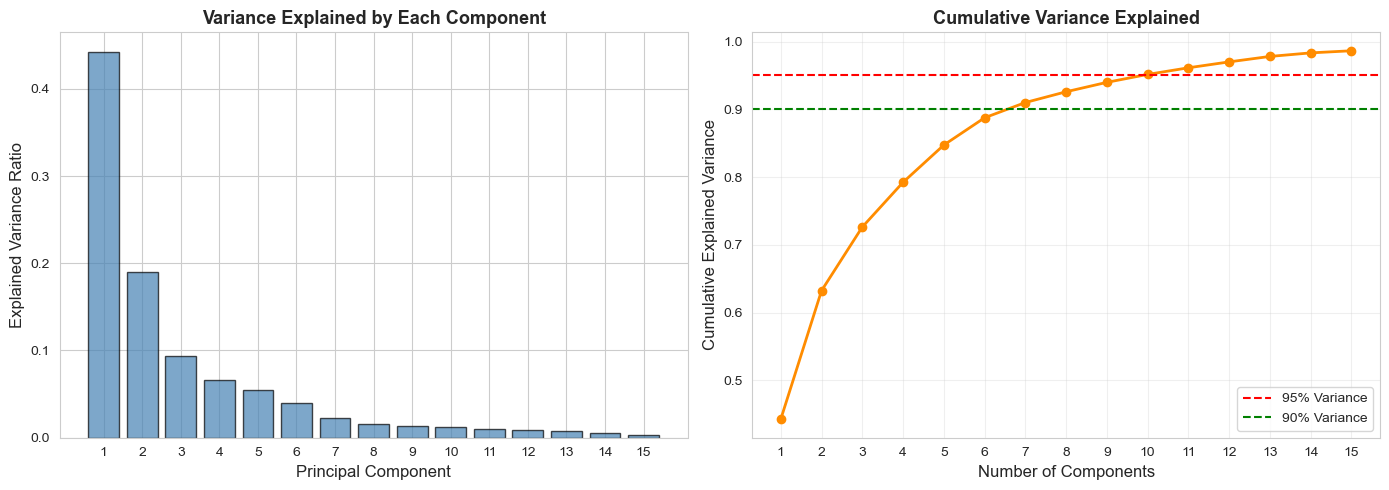


Interpretation:
- Left: Each PC's contribution to total variance
- Right: Cumulative variance - helps decide how many components to keep


In [17]:
# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual explained variance
axes[0].bar(range(1, 16), explained_variance_ratio[:15], alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Variance Explained by Each Component', fontsize=13, fontweight='bold')
axes[0].set_xticks(range(1, 16))

# Cumulative explained variance
axes[1].plot(range(1, 16), cumulative_variance[:15], marker='o', linestyle='-', color='darkorange', linewidth=2)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
axes[1].axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Variance Explained', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 16))

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Left: Each PC's contribution to total variance")
print("- Right: Cumulative variance - helps decide how many components to keep")


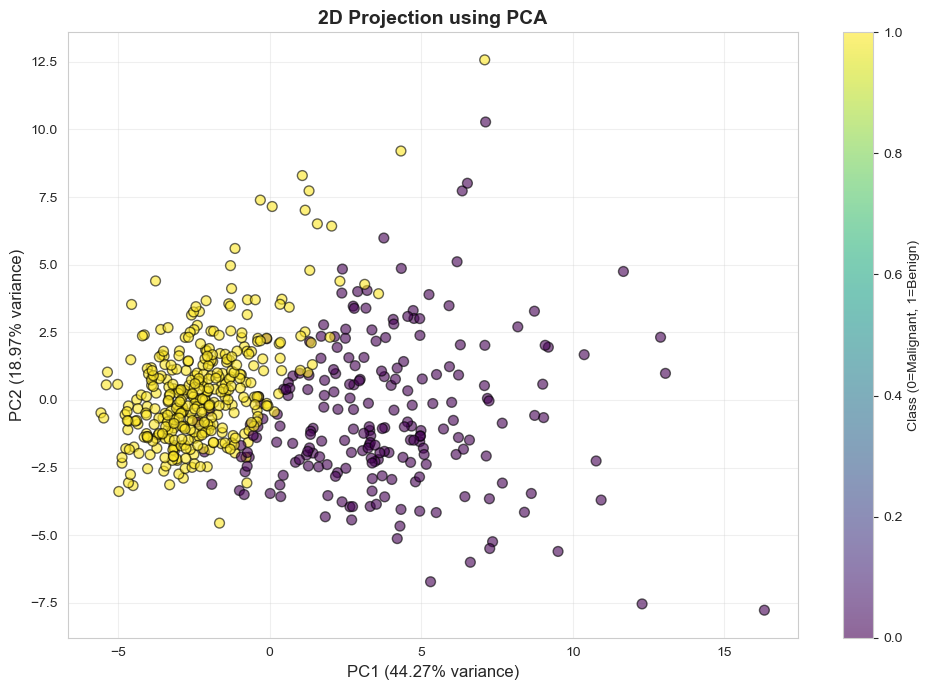

First 2 components capture 63.24% of variance
Classes are reasonably separable in 2D!


In [18]:
# Visualize data in 2D using first 2 principal components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_cancer, cmap='viridis', 
                     alpha=0.6, edgecolors='k', s=50)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('2D Projection using PCA', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Class (0=Malignant, 1=Benign)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"First 2 components capture {pca_2d.explained_variance_ratio_.sum():.2%} of variance")
print("Classes are reasonably separable in 2D!")


In [19]:
# Model comparison: Original vs PCA features
from sklearn.model_selection import cross_val_score

# Use 10 components (captures ~95% variance)
pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X_scaled)

# Logistic Regression model
model = LogisticRegression(max_iter=10000, random_state=42)

# Original features (30)
scores_original = cross_val_score(model, X_scaled, y_cancer, cv=5, scoring='accuracy')

# PCA features (10)
scores_pca = cross_val_score(model, X_pca_10, y_cancer, cv=5, scoring='accuracy')

print("=" * 70)
print("\t\tMODEL PERFORMANCE COMPARISON")
print("=" * 70)
print(f"\nOriginal Features (30 features):")
print(f"  Accuracy: {scores_original.mean():.4f} (+/- {scores_original.std() * 2:.4f})")

print(f"\nPCA Features (10 components, ~{cumulative_variance[9]:.1%} variance):")
print(f"  Accuracy: {scores_pca.mean():.4f} (+/- {scores_pca.std() * 2:.4f})")

print(f"\nDimensionality Reduction: {X_cancer.shape[1]} → {pca_10.n_components} ({(1 - pca_10.n_components/X_cancer.shape[1])*100:.1f}% reduction)")
print(f"Performance Drop: {(scores_original.mean() - scores_pca.mean())*100:.2f}%")
print("=" * 70)
print("\nConclusion: PCA reduced features by 67% with minimal performance loss!")


		MODEL PERFORMANCE COMPARISON

Original Features (30 features):
  Accuracy: 0.9807 (+/- 0.0131)

PCA Features (10 components, ~95.2% variance):
  Accuracy: 0.9789 (+/- 0.0140)

Dimensionality Reduction: 30 → 10 (66.7% reduction)
Performance Drop: 0.18%

Conclusion: PCA reduced features by 67% with minimal performance loss!


---

## Part 5: Feature Creation and Engineering Tricks

Beyond selection and transformation, creating new features is where domain expertise shines.

### Common Feature Engineering Techniques

1. **Polynomial Features**: Create interactions and higher-order terms
2. **Domain-Specific Features**: Use business knowledge
3. **Binning/Discretization**: Convert continuous to categorical
4. **Date/Time Features**: Extract year, month, day, hour, etc.
5. **Text Features**: TF-IDF, word counts, sentiment scores
6. **Aggregations**: Group-by statistics (mean, sum, count)

### Example: Polynomial Features

Polynomial features create interaction terms and powers of features.


In [20]:
# Polynomial Features Example
from sklearn.preprocessing import PolynomialFeatures

# Create simple dataset
sample_data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 4, 6, 8, 10]
})

print("Original Features:")
print(sample_data)

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(sample_data)
poly_feature_names = poly.get_feature_names_out(sample_data.columns)

poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

print("\nAfter Polynomial Features (degree=2):")
print(poly_df)
print(f"\nOriginal features: {sample_data.shape[1]}")
print(f"After polynomial: {poly_df.shape[1]}")
print(f"\nNew features include: X1, X2, X1², X1*X2, X2²")


Original Features:
   X1  X2
0   1   2
1   2   4
2   3   6
3   4   8
4   5  10

After Polynomial Features (degree=2):
    X1    X2  X1^2  X1 X2   X2^2
0  1.0   2.0   1.0    2.0    4.0
1  2.0   4.0   4.0    8.0   16.0
2  3.0   6.0   9.0   18.0   36.0
3  4.0   8.0  16.0   32.0   64.0
4  5.0  10.0  25.0   50.0  100.0

Original features: 2
After polynomial: 5

New features include: X1, X2, X1², X1*X2, X2²


---

## Hands-on Exercises

Practice feature engineering with these exercises. They're designed to reinforce what you've learned.

### Exercise 1: Scaling Comparison

**Task**: Create a dataset with outliers and compare StandardScaler vs RobustScaler

**Steps**:
1. Create a dataset with normal features and add outliers
2. Apply both scalers
3. Visualize the difference
4. Train models with both and compare performance

**Hint**: Use `np.random.randn()` for normal data and manually add extreme values


In [21]:
# Exercise 1: Your code here

# Step 1: Create data with outliers
# np.random.seed(42)
# X_normal = np.random.randn(100, 2) * 10 + 50
# X_normal[0, 0] = 200  # Add outlier
# X_normal[1, 1] = -50  # Add outlier

# Step 2: Apply scalers
# scaler_std = StandardScaler()
# scaler_robust = RobustScaler()
# X_scaled_std = scaler_std.fit_transform(X_normal)
# X_scaled_robust = scaler_robust.fit_transform(X_normal)

# Step 3: Visualize

# Step 4: Compare model performance


### Exercise 2: Encoding Challenge

**Task**: Create a dataset with mixed categorical variables and apply appropriate encoding

**Steps**:
1. Create a DataFrame with:
   - Nominal variable (e.g., City: NYC, LA, SF)
   - Ordinal variable (e.g., Satisfaction: Low, Medium, High)
   - High cardinality variable (e.g., 20+ categories)
2. Apply appropriate encoding to each
3. Train a model and evaluate

**Hint**: Use different encoders for different variable types


In [22]:
# Exercise 2: Your code here

# Step 1: Create mixed categorical data
# cities = ['NYC', 'LA', 'SF'] * 100
# satisfaction = ['Low', 'Medium', 'High'] * 100  
# product_id = [f'P{i}' for i in range(30)] * 10

# Step 2: Apply encodings

# Step 3: Train and evaluate


### Exercise 3: Feature Selection Pipeline

**Task**: Compare all three feature selection methods on the same dataset

**Steps**:
1. Load California Housing dataset
2. Apply Filter, Wrapper, and Embedded methods
3. Select top 5 features from each method
4. Compare the selected features - are they similar?
5. Train models with each feature set and compare performance

**Hint**: Use SelectKBest, RFE, and SelectFromModel


In [23]:
# Exercise 3: Your code here

# Step 1: Load data
# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing()
# X, y = housing.data, housing.target

# Step 2-3: Apply methods

# Step 4: Compare features

# Step 5: Compare performance


---

## Key Takeaways

### What We Learned Today

#### 1. Feature Scaling
- **StandardScaler**: Mean=0, Std=1 (best for normal distributions)
- **MinMaxScaler**: Scales to [0,1] range (sensitive to outliers)
- **RobustScaler**: Uses median and IQR (robust to outliers)
- **Always scale** before: Linear models, SVM, KNN, Neural Networks, PCA
- **Don't scale** for: Tree-based models (Random Forest, XGBoost)

#### 2. Categorical Encoding
- **Label Encoding**: For ordinal variables and tree models
- **One-Hot Encoding**: For nominal variables with low cardinality
- **Ordinal Encoding**: Preserves order for ranked categories
- **Choose based on**: Variable type, cardinality, and algorithm

#### 3. Feature Selection
- **Filter Methods**: Fast, model-agnostic (SelectKBest, chi2, f_classif)
- **Wrapper Methods**: Slow but accurate (RFE)
- **Embedded Methods**: Good balance (Random Forest importance, Lasso)
- **Goal**: Remove noise, reduce overfitting, improve speed

#### 4. Dimensionality Reduction (PCA)
- Transforms features into uncorrelated components
- First component captures most variance
- Use when: High dimensionality, multicollinearity, visualization
- Always standardize data first
- Trade-off: Speed vs interpretability

#### 5. Feature Creation
- Polynomial features for non-linear relationships
- Domain knowledge creates powerful features
- Interaction terms capture relationships
- Date/time features unlock temporal patterns


### Feature Engineering Decision Framework

**Step 1: Understand Your Data**
- Check data types (numerical, categorical, text, datetime)
- Identify missing values
- Look for outliers
- Understand domain context

**Step 2: Choose Scaling Method**
```
If outliers present → RobustScaler
If need [0,1] range → MinMaxScaler
Otherwise → StandardScaler (default choice)
```

**Step 3: Encode Categorical Variables**
```
If ordinal (has order) → OrdinalEncoder
If nominal + low cardinality (<10) → OneHotEncoder
If nominal + high cardinality (>50) → Target Encoding or Embeddings
If tree-based model → LabelEncoder is fine
```

**Step 4: Select Features**
```
Start with Filter Methods (fast baseline)
→ Use Embedded Methods (Random Forest importance)
→ Try Wrapper Methods if you have time
→ Compare results
```

**Step 5: Consider Dimensionality Reduction**
```
If features > 50 and highly correlated → PCA
If need visualization → PCA to 2D/3D
If non-linear relationships → t-SNE or UMAP
```

**Step 6: Create New Features**
```
Domain knowledge → Custom features
Non-linear relationships → Polynomial features
Categorical combinations → Interaction terms
Time-based data → Extract temporal features
```


### Industry Best Practices

1. **Always fit on training data, transform test data**
   ```python
   scaler.fit(X_train)  # Learn parameters from training
   X_train_scaled = scaler.transform(X_train)
   X_test_scaled = scaler.transform(X_test)  # Apply same transformation
   ```

2. **Use Pipeline for consistent transformations**
   ```python
   from sklearn.pipeline import Pipeline
   pipe = Pipeline([
       ('scaler', StandardScaler()),
       ('selector', SelectKBest(k=10)),
       ('model', LogisticRegression())
   ])
   ```

3. **Handle missing values before scaling**
   - Scaling doesn't work with NaN values
   - Impute first, then scale

4. **Document your feature engineering**
   - Keep track of transformations
   - Helps with reproducibility
   - Critical for production deployment

5. **Start simple, then add complexity**
   - Baseline: StandardScaler + all features
   - Then: Add feature selection
   - Finally: Create new features

6. **Monitor feature importance over time**
   - Features that worked yesterday may not work tomorrow
   - Re-evaluate periodically

### Common Mistakes to Avoid

- Fitting scaler on entire dataset (data leakage)
- One-hot encoding high cardinality variables (dimensionality explosion)
- Not scaling before PCA
- Using Label Encoding for nominal variables in linear models
- Removing too many features (losing important information)
- Creating too many polynomial features (overfitting)
- Forgetting to save transformers for production
- Not validating feature engineering choices with cross-validation


---

## Next Steps

### Tomorrow (Day 14): Mini-Project - Algorithm Comparison

Tomorrow, you'll apply everything you've learned to compare multiple ML algorithms on a real dataset. You'll use:
- Feature engineering techniques from today
- Model evaluation metrics from Day 12
- Hyperparameter tuning from Day 11
- Various algorithms from Week 2

### Further Learning Resources

**Books**:
- "Feature Engineering for Machine Learning" by Alice Zheng & Amanda Casari
- "Feature Engineering and Selection" by Max Kuhn & Kjell Johnson

**Documentation**:
- [Scikit-learn Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)
- [Scikit-learn Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
- [PCA Explained](https://scikit-learn.org/stable/modules/decomposition.html#pca)

**Articles & Tutorials**:
- "Feature Engineering: What Powers Machine Learning" - Towards Data Science
- "A Feature Selection Tool for Machine Learning" - KDnuggets
- Kaggle Feature Engineering Courses

**Practice Datasets**:
- Kaggle: Feature Engineering competitions
- UCI Machine Learning Repository
- Real-world datasets from your domain

### Quick Reference Cheat Sheet

**Scaling**:
```python
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
```

**Encoding**:
```python
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# One-Hot: pd.get_dummies(df, columns=['col'])
# Ordinal: OrdinalEncoder(categories=[['low', 'med', 'high']])
```

**Feature Selection**:
```python
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
# Filter: SelectKBest(f_classif, k=10)
# Wrapper: RFE(estimator, n_features_to_select=10)
# Embedded: SelectFromModel(RandomForestClassifier())
```

**PCA**:
```python
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))
```

---

**Remember**: Feature engineering is both art and science. Domain knowledge + experimentation = success.

The best feature engineering comes from deeply understanding your problem and data. Don't just apply techniques blindly—think about what makes sense for your specific use case.


---
## Let's Connect
- **LinkedIn:** [hashirahmed07](https://www.linkedin.com/in/hashirahmed07/)
- **Email:** [Hashirahmad330@gmail.com](mailto:Hashirahmad330@gmail.com)
- **GitHub:** [CodeByHashir](https://github.com/CodeByHashir)
